# **Rock Paper Scissor - CNN**

In [25]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torch.utils.data import random_split

In [26]:
%matplotlib inline

## **Data Processing**

In [20]:
transform = transforms.Compose(
    [
        transforms.Resize((200, 300)), 
        transforms.ToTensor(), 
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

In [21]:
data = datasets.ImageFolder(
    "/kaggle/input/rockpaperscissors", 
    transform = transform,
)

In [22]:
train_data, test_data = random_split(data, [0.8, 0.2])

In [23]:
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = True)

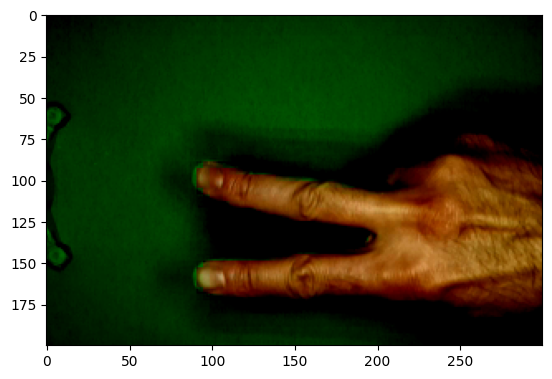

In [34]:
plt.imshow(train_loader.dataset[17][0].detach().numpy().transpose((1, 2, 0)))

In [35]:
train_data.dataset[17][1]

0

## **Playing with Convolution & Pooling layers........**

In [68]:
conv1 = nn.Conv2d(3, 6, 3, 1)
conv2 = nn.Conv2d(6, 12, 3, 1)
conv3 = nn.Conv2d(12, 16, 3, 1)

pool1 = nn.MaxPool2d(2, 2)

X = F.relu(conv1(train_loader.dataset[17][0]))
X = pool1(X)
X = F.relu(conv2(X))
X = pool1(X)
X = F.relu(conv3(X))
X = pool1(X)

In [69]:
X.shape

torch.Size([16, 23, 35])

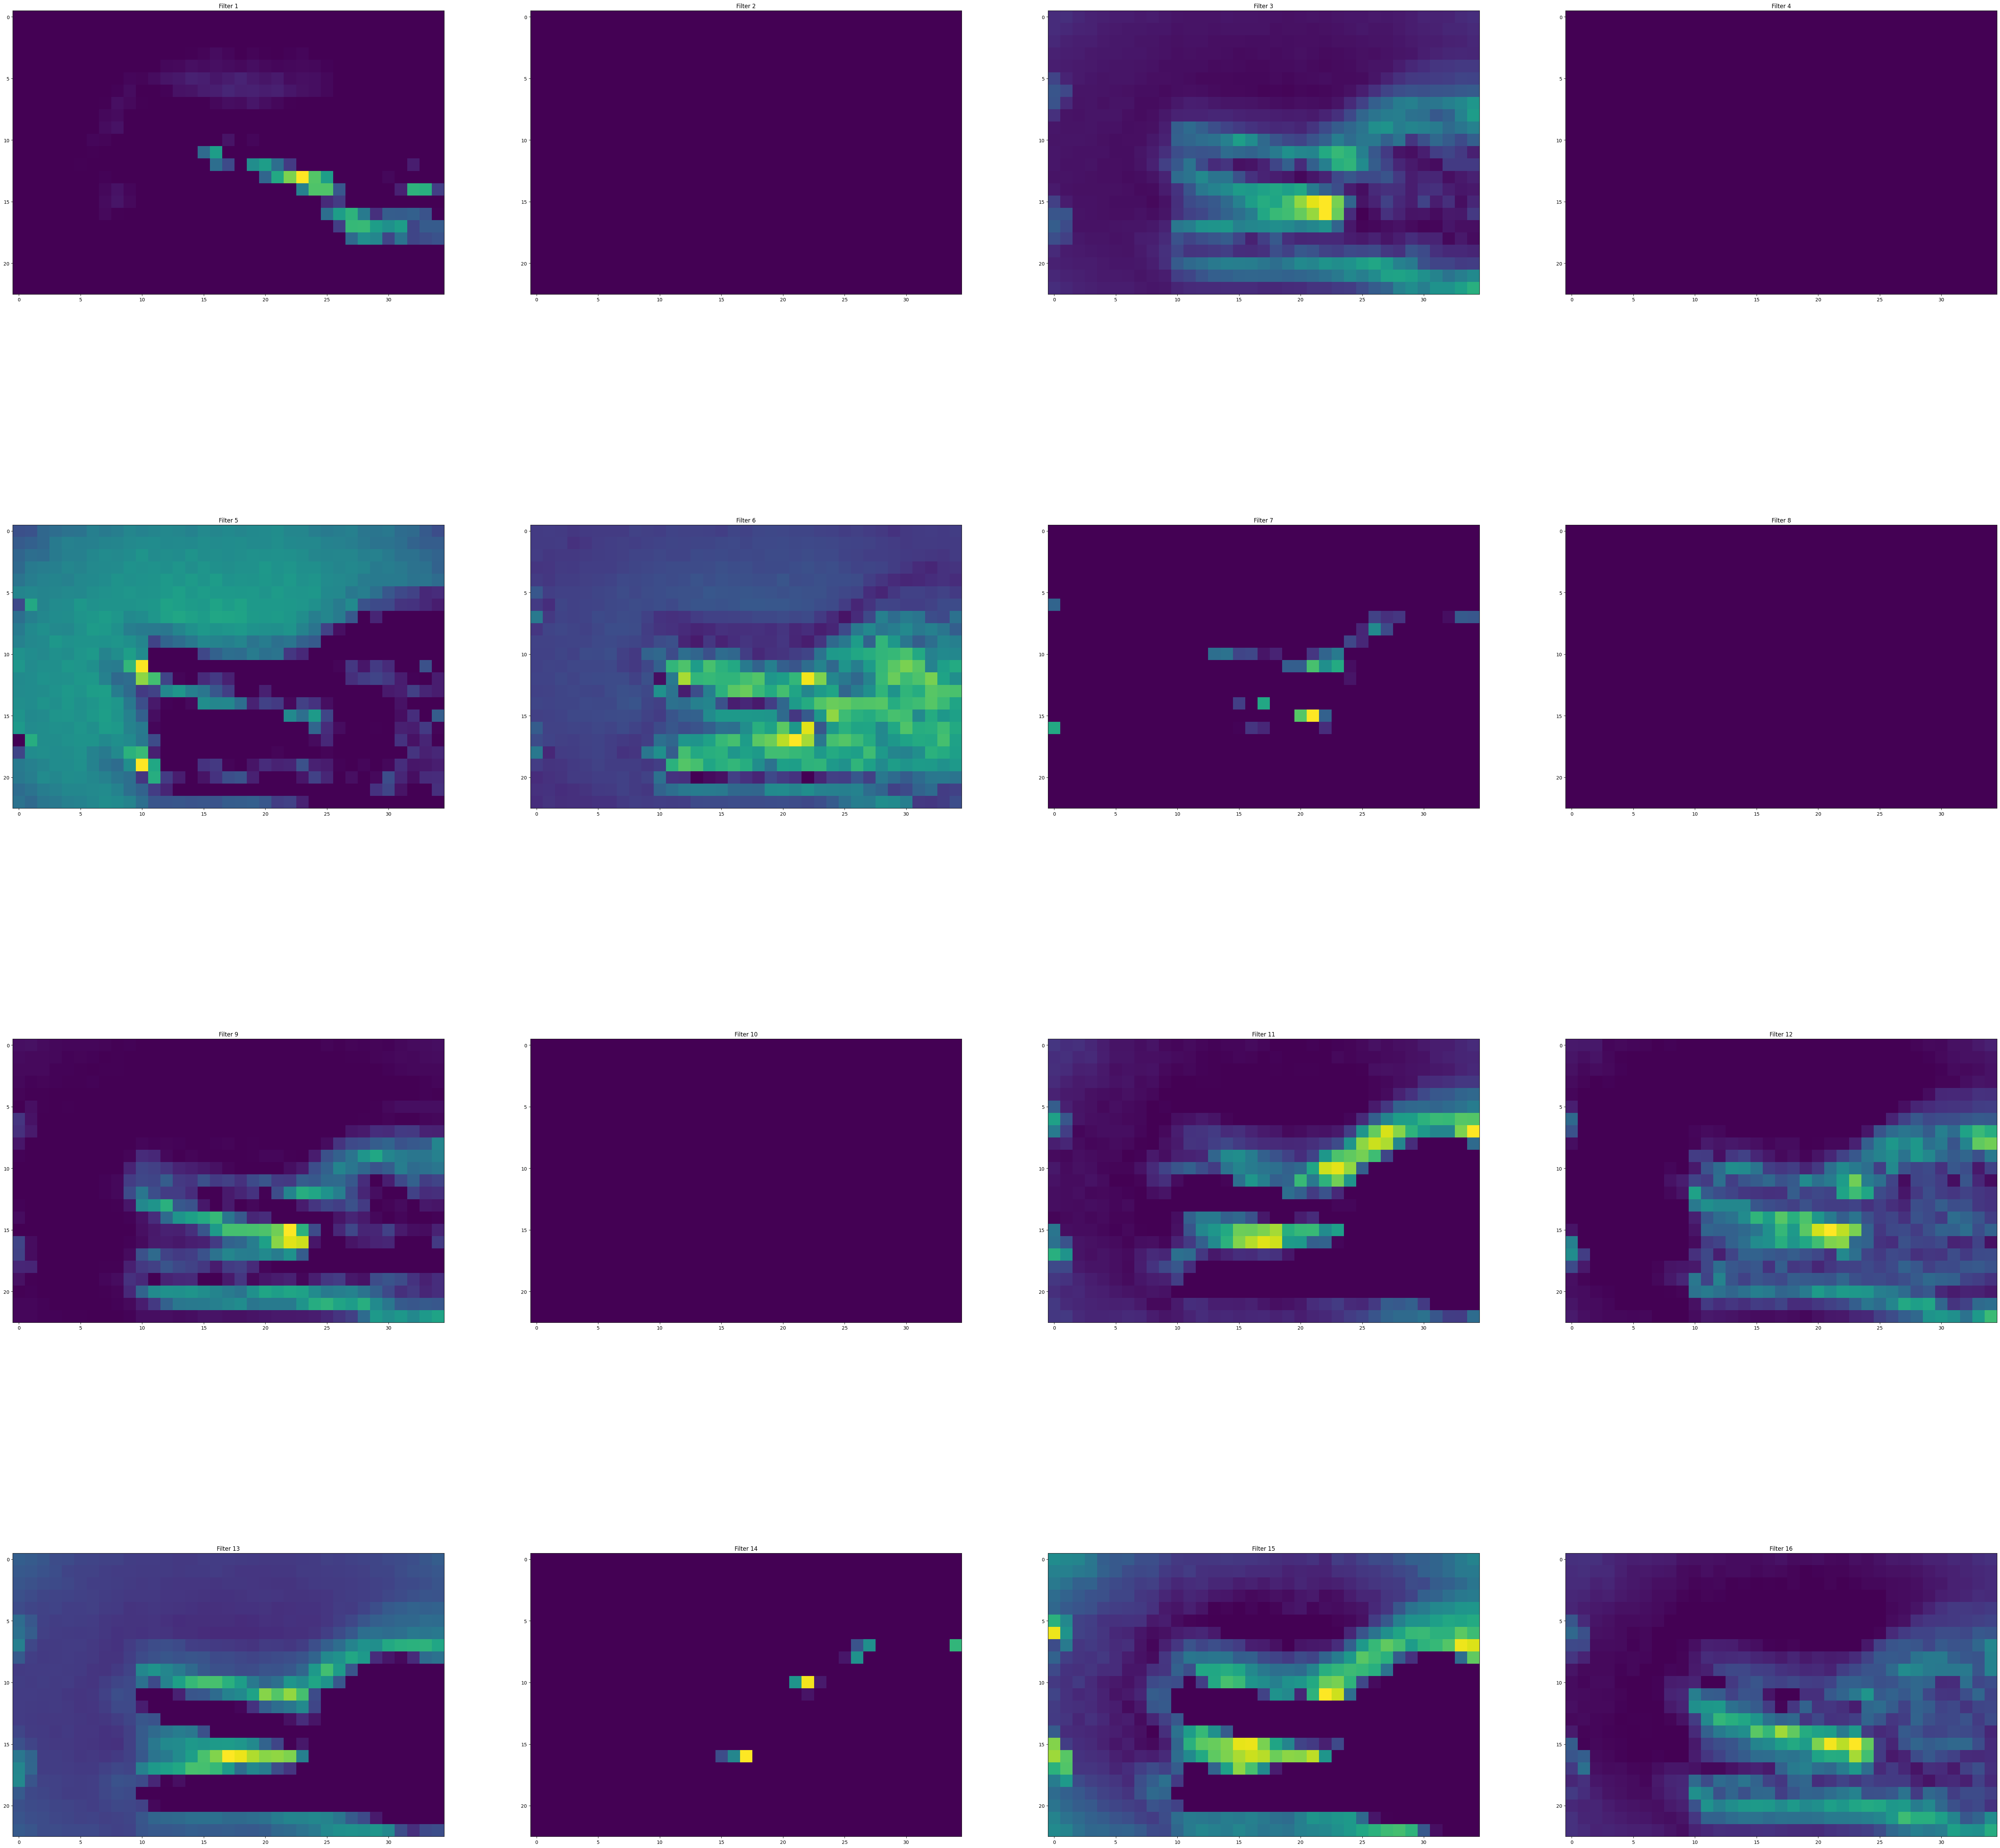

In [49]:
fig = plt.figure(figsize = (75, 75))

for i in range(16):
    fig.add_subplot(4, 4, i + 1)
    plt.imshow(X[i].detach().numpy())
    plt.title(f"Filter {i + 1}")

## **Creating The Model** 

In [75]:
class CNN(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.feature_extraction = nn.Sequential(
            nn.Conv2d(3, 6, 3, 1), 
            nn.ReLU(), 
            nn.MaxPool2d(2, 2), 
            
            nn.Conv2d(6, 12, 3, 1), 
            nn.ReLU(), 
            nn.MaxPool2d(2, 2), 
            
            nn.Conv2d(12, 16, 3, 1), 
            nn.ReLU(), 
            nn.MaxPool2d(2, 2)
        )
        
        self.fc_layers = nn.Sequential(
            nn.Linear(16 * 23 * 35, 120),
            nn.Linear(120, 84), 
            nn.Linear(84, 84), 
            nn.Linear(84, 56), 
            nn.Linear(56, 4)
        )
    
    def forward(self, X):
        X = self.feature_extraction(X)
        X = X.view(-1, 16 * 23 * 35)
        X = self.fc_layers(X)
        
        return F.log_softmax(X, dim = 1)

In [76]:
Model = CNN()

In [77]:
Model

CNN(
  (feature_extraction): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(12, 16, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=12880, out_features=120, bias=True)
    (1): Linear(in_features=120, out_features=84, bias=True)
    (2): Linear(in_features=84, out_features=84, bias=True)
    (3): Linear(in_features=84, out_features=56, bias=True)
    (4): Linear(in_features=56, out_features=4, bias=True)
  )
)

In [78]:
criterion = nn.CrossEntropyLoss()# loss function
optimizer = torch.optim.Adam(Model.parameters(), lr = 0.001)# optimizer

## **Training The Model**

In [79]:
if __name__ == "__main__":
    for epoch in range(100):
        for b, (X, y) in enumerate(train_loader.dataset):
            y_pred = Model(X)
            loss = criterion(y_pred, torch.LongTensor([y]))
            
            # Back Propagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (b + 1) % 100 == 0:
                print(f"Epoch : {epoch + 1}, Batch : {b + 1}, Loss : {loss.item()}")

Epoch : 1, Batch : 100, Loss : 1.0429718494415283
Epoch : 1, Batch : 200, Loss : 0.7025506496429443
Epoch : 1, Batch : 300, Loss : 1.5153717994689941
Epoch : 1, Batch : 400, Loss : 0.6412063241004944
Epoch : 1, Batch : 500, Loss : 1.5291852951049805
Epoch : 1, Batch : 600, Loss : 0.5376027226448059
Epoch : 1, Batch : 700, Loss : 0.775806188583374
Epoch : 1, Batch : 800, Loss : 1.9573769569396973
Epoch : 1, Batch : 900, Loss : 1.7884007692337036
Epoch : 1, Batch : 1000, Loss : 1.7338309288024902
Epoch : 1, Batch : 1100, Loss : 0.6368626952171326
Epoch : 1, Batch : 1200, Loss : 0.8000598549842834
Epoch : 1, Batch : 1300, Loss : 1.758084774017334
Epoch : 1, Batch : 1400, Loss : 1.8215489387512207
Epoch : 1, Batch : 1500, Loss : 0.7552960515022278
Epoch : 1, Batch : 1600, Loss : 1.7459678649902344
Epoch : 1, Batch : 1700, Loss : 0.7175875902175903
Epoch : 1, Batch : 1800, Loss : 0.8779739141464233
Epoch : 1, Batch : 1900, Loss : 0.8490725159645081
Epoch : 1, Batch : 2000, Loss : 1.76936030

KeyboardInterrupt: 

## **Accuracy Of The Model**

In [103]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_loader.dataset:
    y_pred = Model(X_test)
    predicted = torch.max(y_pred, 1)[1]
    correct += (predicted == y_test).sum()

In [106]:
# Accuracy
print(f"Accuracy : {correct.item() / 700 * 100}%")

Accuracy : 62.28571428571429%


## **Saving The Model**

In [107]:
torch.save(Model.state_dict(), "RockPaperScissor_CNN_Model.pt")